KRISHA GOTI , C035


# IP Experiment No. 10: Discrete Cosine Transform and Image Compression<br>



Aim: <br>
1. Apply 2D-Discrete Cosine Transform on the given test image.
2.	Obtain compression ratio between the test image and reconstructed image using selected number of highest energy coefficients of the transformed image are retained.
Comment on the subjective quality of the reconstructed image.

Theory:<br>

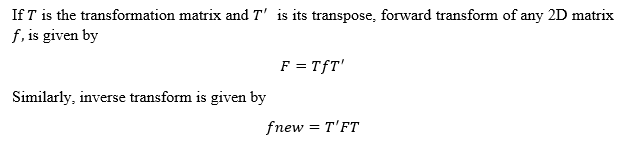

DCT Transform
1. Real valued and unitary
2. Basis vectors are sampled form of cosine signal
3. Widely used for image compression


In [ ]:
import cv2
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.fftpack import idct

# To generate the DCT transform matrix

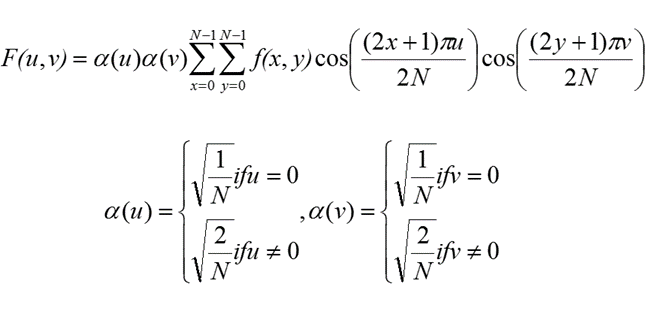

A 4 x 4 DCT cosine transform <br>
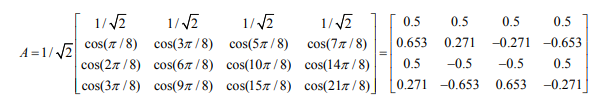

# To compute DFT of 1D matrix<br>


Example:
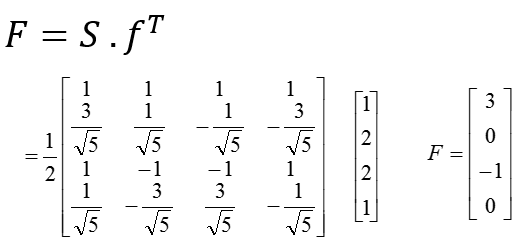

In [ ]:
# five input array f from above example, compute the 1D DCT and display the value

x = [1,2,2,1]
X = dct(x, norm="ortho")
print('X = ', X)

X =  [ 3.  0. -1.  0.]


# To recover the original matrix using inverse DCT

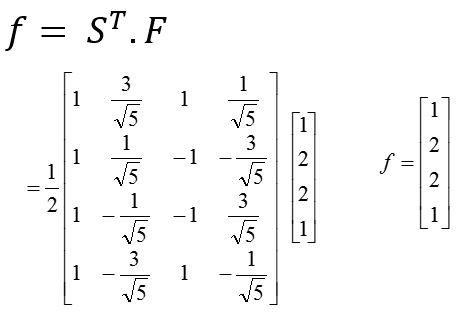

In [ ]:
# compute the Inverse DCT of the above transformed image F
recover = idct(X, norm="ortho")
print("Recovered x = ", recover)


Recovered x =  [1. 2. 2. 1.]


# Generate 2D DCT of given matrix

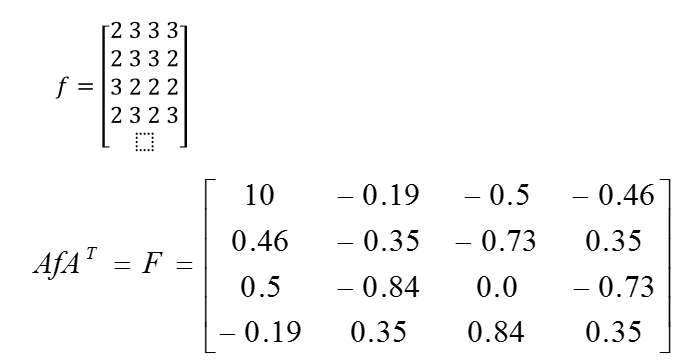

In [ ]:
# Compute the 2D DCT for the input f given in above example
x = np.array([[2,3,3,2],[2,3,3,2],[3,2,2,2],[2,3,2,3]])
X = dct(dct(x, axis=0, norm="ortho"), axis=1, norm="ortho")
print('X = ', X)



X =  [[ 9.75        0.13529903 -0.75       -0.32664074]
 [ 0.13529903  0.0732233  -1.05917856  0.53033009]
 [ 0.25       -0.51798246 -0.25       -0.59723879]
 [-0.32664074  0.53033009  0.70932417  0.4267767 ]]


Inverse DCT <br>

In [ ]:
# conpute the inverse DCT of F
xrec = idct(idct(X, axis = 0, norm="ortho"), axis = 1, norm="ortho")
print("Recovered x =", xrec)



Recovered x = [[2. 3. 3. 2.]
 [2. 3. 3. 2.]
 [3. 2. 2. 2.]
 [2. 3. 2. 3.]]


#To find the DCT of an image

In [ ]:
#Function to implement 2D DCT and IDCT
def dct2(a):
  return dct(dct(a, axis=0, norm= "ortho"), axis= 1, norm="ortho")

In [ ]:
def idct2(a):
  return idct(idct(a, axis=0, norm="ortho"), axis=1, norm="ortho")

(-0.5, 511.5, 511.5, -0.5)

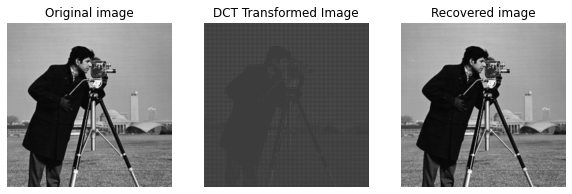

In [ ]:
# Read the input image
x = cv2.imread("cameraman.tiff", 0)
m, n = x.shape
# Compute the rows and columns of the image
X = np.zeros((m, n), dtype = int)
N = 4
# Define a imgdct matrix of zeros of size of the image which is to be filled with the DCT coefficents during the computation
for i in range(0, m//N):
  for j in range(0, n//N):
    blk = x[i*N: (i+1)*N, j*N:(j+1)*N]
    X[i*N: (i+1)*N, j*N: (j+1)*N] = dct2(blk)

# Since the DCT matrix is a 4x4 matrix , we have to take 4x4 matrix of image and then apply DCT to each section
Xrec = np.zeros((m, n), dtype = int)
for i in range(0, m//N):
  for j in range(0, n//N):
    blk = X[i*N: (i+1)*N, j*N: (j+1)*N]
    Xrec[i*N: (i+1)*N, j*N: (j+1)*N] = idct2(blk)


#plot the DCT transformed image
plt.figure(figsize = (10, 10))
plt.subplot(131)
plt.imshow(x, cmap="gray")
plt.title("Original image")
plt.axis("off")

plt.subplot(132)
plt.imshow(X, cmap="gray")
plt.title("DCT Transformed Image")
plt.axis("off")

plt.subplot(133)
plt.imshow(Xrec, cmap="gray")
plt.title("Recovered image")
plt.axis("off")



#For compression we retain the first few coefficients having 1% of total energy

Find the total energy of the original image <br>
$Total Energy = sum|F(x,y)|^2$

In [ ]:
# compute the total energy of the image using the formula given above
E = np.sum(x**2)

Compute P = 1% of the total energy

In [ ]:
# compute 1% of the total energy
P = 0.001 * E

Select those coefficients in the Transformed image which have more than 1% energy from Transformed coefficients

In [ ]:
# Retain only those coefficients for imagdct which are > 1% of total energy
Xcomp = np.where(X**2 > P, X, 0)

In [ ]:
#Find IDCT of the imgdct matrix of the retained coefficeints
Xrec = np.zeros((m, n), dtype = int)
for i in range(0, m//N):
  for j in range(0, n//N):
    blk = X[i*N: (i+1)*N, j*N: (j+1)*N]
    Xrec[i*N: (i+1)*N, j*N: (j+1)*N] = idct2(blk)



(-0.5, 511.5, 511.5, -0.5)

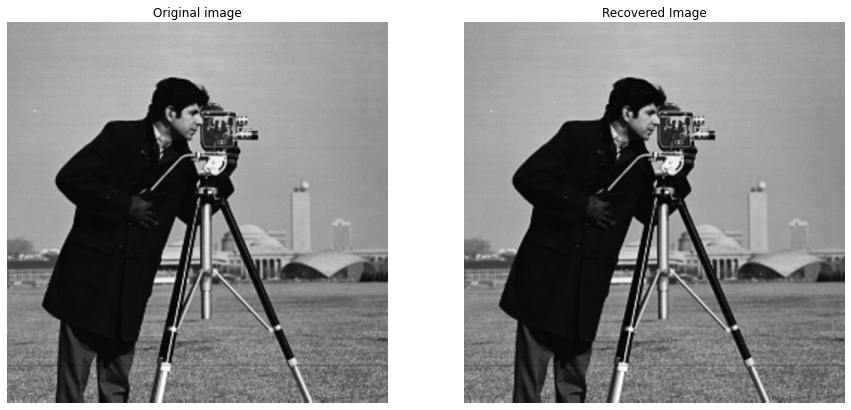

In [ ]:
#Plott the original and the compressed image

plt.figure(figsize = (15, 15))
plt.subplot(121)
plt.imshow(x, cmap="gray")
plt.title("Original image")
plt.axis("off")

plt.subplot(122)
plt.imshow(Xrec, cmap="gray")
plt.title("Recovered Image")
plt.axis("off")





Compression Ratio = size after compression/size before compression

In [ ]:
#Finding the nonzero values in the Inew matrix
nonzero = np.count_nonzero(Xcomp)
print("Non-zero values = ", nonzero)




Non-zero values =  13215


In [ ]:
#Total coefficients in the original image
Tot_coeff = m*n
print("Total coefficients = ", nonzero)

Total coefficients =  13215


In [ ]:
# compute the compression ratio by calculating CR=number of non-zero coefficients/total number of coefficeints
CR = (nonzero/Tot_coeff)*100
print('Compression Ratio = ', CR, '%')



Compression Ratio =  5.0411224365234375 %


# Conclusion

1. Implemented 1D-Discrete Cosine Transform on the given image.
2. Implemented 2D-Discrete Cosine Transform on the given image.
3. Calculated the compression ratio between the given image and recovered image. Counted the total number of non-zero coefficients.